### Import Libraries and Data


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import context
from os import path


%matplotlib inline
sns.set_theme(style="whitegrid")

abundance_df = pd.read_csv(path.join(context.proj_dir, 'data', 'abundance.csv'))
print("Dataset size: {}".format(abundance_df.shape))
abundance_df.head()

Dataset size: (3610, 3513)


c:\users\ahmad\myenvs\python3-9-env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,5,9,20,26,42,47,51,52,59,61,68,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Candela_Africa,H12,h12,stool,n,8,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Candela_Africa,H13,h13,stool,n,34,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Candela_Africa,H14,h14,stool,n,30,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
## To check disease in datasets
abundance_df.groupby('dataset_name')['disease'].value_counts()

dataset_name                       disease                   
Candela_Africa                     n                              38
Chatelier_gut_obesity              obesity                       164
                                   leaness                        89
                                   n                              25
Loman2013_EcoliOutbreak_DNA_HiSeq  stec2-positive                 43
                                    -                              1
Loman2013_EcoliOutbreak_DNA_MiSeq  stec2-positive                  9
Neilsen_genome_assembly            n                             187
                                   ibd_ulcerative_colitis        127
                                   n_relative                     47
                                   ibd_crohn_disease              21
Psoriasis_2014                     y                              36
                                   n                              34
Quin_gut_liver_cirrhosis           cirrho

### Exploring/Cleaning Dataset

In [3]:
# lets work with a few datasets only (diabetes, obesity, leanness)
abundance_df = abundance_df.loc[(abundance_df.dataset_name == 'WT2D') |
                                (abundance_df.dataset_name == 't2dmeta_long')|
                                (abundance_df.dataset_name == 't2dmeta_short') |
                                (abundance_df.dataset_name == 'Chatelier_gut_obesity'),:]

# change missing values to nan
abundance_df = abundance_df.replace('nd', np.nan).replace('na', np.nan).replace('-', np.nan).replace(' -', np.nan)
print(abundance_df.shape)
abundance_df.head()

(786, 3513)


,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
38,Chatelier_gut_obesity,MH0002,mh0002,stool,n,NaN,NaN,denmark,Illumina,23985870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,Chatelier_gut_obesity,MH0003,mh0003,stool,obesity,NaN,NaN,denmark,Illumina,23985870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,Chatelier_gut_obesity,MH0006,mh0006,stool,leaness,NaN,NaN,denmark,Illumina,23985870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,Chatelier_gut_obesity,MH0009,mh0009,stool,n,NaN,NaN,denmark,Illumina,23985870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,Chatelier_gut_obesity,MH0011,mh0011,stool,leaness,NaN,NaN,denmark,Illumina,23985870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


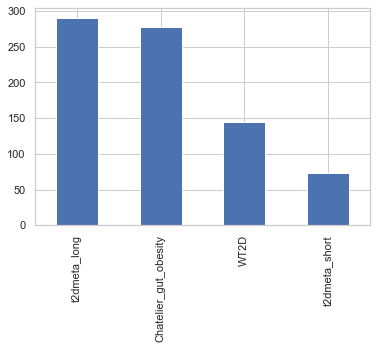

In [4]:
# unique datasets
df = abundance_df['dataset_name'].value_counts().plot.bar()

<AxesSubplot:ylabel='dataset_name'>

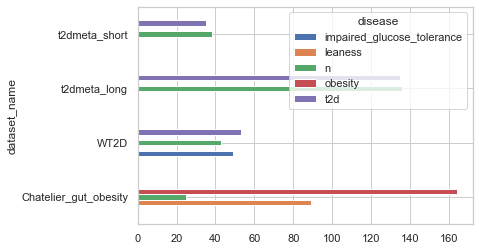

In [5]:
# Unique diseases in all datasets
abundance_df.groupby('dataset_name')['disease'].value_counts().unstack().plot.barh()

In [6]:
# divided the abundance data to metadata and species data
split_index = abundance_df.columns.get_loc('k__Archaea')
disease_metadata = abundance_df.iloc[:, 0:split_index]
disease_species = abundance_df.iloc[:, split_index:]
print("Disease Metadata: {}".format(disease_metadata.shape))
print("Disease Species: {}".format(disease_species.shape))

Disease Metadata: (786, 211)
Disease Species: (786, 3302)


In [7]:
# finding the columns with entry as na
cols = (  disease_metadata.isna().sum()  !=  len(disease_metadata)  )
# deleting the columns with every entry as na
disease_metadata_short = disease_metadata[cols[cols].index]
disease_metadata_short.shape

(786, 61)

In [8]:
# get rid of more redundant and unnecessary variables in metadata
unimportant =['subjectID', 'sequencing_technology', 'pubmedid','#SampleID',
           'diabetic','bodysite','classification']
disease_metadata_short = disease_metadata_short.drop(columns = unimportant)
disease_metadata_short.shape

(786, 54)

In [9]:
# finding the columns with max entry to zero to remove uninformative variables
# All values for species >=0, so a column with a max entry of zero means has all zeroes
cols = (  disease_species.max()  !=  0 )
#subseting the species data to informative variables
disease_species_short = disease_species[cols[cols].index]
disease_species_short.shape


(786, 1715)

In [10]:
# merge the metadata and species data together after filtering out uninformative variables
disease_short = disease_metadata_short.join(disease_species_short)
disease_short.head()

,dataset_name,sampleID,disease,age,gender,country,paired_end_insert_size,read_length,total_reads,matched_reads,...,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii|t__Vibrio_furnissii_unclassified,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_sp_2_2_4,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_sp_2_2_4|t__GCF_000157055,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_fusiformis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_fusiformis|t__Lysinibacillus_fusiformis_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_sphaericus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Lysinibacillus|s__Lysinibacillus_sphaericus|t__Lysinibacillus_sphaericus_unclassified
38,Chatelier_gut_obesity,MH0002,n,NaN,NaN,denmark,139/370,75,46564054,28295708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,Chatelier_gut_obesity,MH0003,obesity,NaN,NaN,denmark,143/357,75,50381662,31800850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,Chatelier_gut_obesity,MH0006,leaness,NaN,NaN,denmark,233,44/75,161145974,112203684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,Chatelier_gut_obesity,MH0009,n,NaN,NaN,denmark,146/373,75,58446132,34215593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,Chatelier_gut_obesity,MH0011,leaness,NaN,NaN,denmark,146/368,75,58492736,34218208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#all of the continuous and discrete variables in the metadata
num_var = ['age','bmi','height','weight','fbg','sbp','dbp','fins','fcp','hbalc','tg',
        'tcho','hdl','ldl','whr','wc','cholesterol','triglycerides','creatinine',
         'y-gt','fasting_glucose','fasting_insulin','hba1c','hscrp','c-peptide','tnfa',
         'il-1','cd163','years_in_sweden','glp-1','fgf-19','leptin','adiponectin',
         'gad-antibodies']
#converts all of the continuous and discrete variables to numeric
disease_short.loc[:, num_var] = disease_short.loc[:, num_var].apply(pd.to_numeric,
                                                                  errors='coerce', axis=1)
disease_short.shape

(786, 1769)

In [12]:
# replaces the missing values in cholesterol with tcho values
# tcho and cholesterol are from WT2D and T2Dmeta respectively and they both represent
# total cholesterol
s = disease_short['sampleID'].map(disease_short.set_index('sampleID')['tcho'])
disease_short['cholesterol'] = disease_short['cholesterol'].mask(disease_short['cholesterol'].isnull(), s)

In [13]:
# replaces the missing values in fasting_glucose with fbg values
# fasting_glucose and fbg are from WT2D and T2Dmeta respectively and they both represent
# fasting blood glucose
s = disease_short['sampleID'].map(disease_short.set_index('sampleID')['fbg'])
disease_short['fasting_glucose'] = disease_short['fasting_glucose'].mask(disease_short['fasting_glucose'].isnull(), s)

In [14]:
# replaces the missing values in triglycerides with tg values
# triglycerides and tg are from WT2D and T2Dmeta respectively and they both represent
# Triglyceride levels
s = disease_short['sampleID'].map(disease_short.set_index('sampleID')['tg'])
disease_short['triglycerides'] = disease_short['triglycerides'].mask(disease_short['triglycerides'].isnull(), s)

In [15]:
# replaces the missing values in fasting_insulin with fins values
# fasting_insulin and fins (Fasting Insulin Serum) are from WT2D and T2Dmeta respectively and they both represent
# fasting insulin serum
s = disease_short['sampleID'].map(disease_short.set_index('sampleID')['fins'])
disease_short['fasting_insulin'] = disease_short['fasting_insulin'].mask(disease_short['fasting_insulin'].isnull(), s)
disease_short.shape

(786, 1769)

In [16]:
#gender is not recorded for the WT2D data b/c it was a study conducted on only women.
#replace all nas with female in WT2D
mask1 = (disease_short.dataset_name == "WT2D") & (disease_short.gender.isna())
disease_short.loc[mask1, 'gender'] = 'female'

In [17]:
redundant = ['tcho','fbg','fins','tg']
disease_short = disease_short.drop(columns=redundant)
disease_short.shape

(786, 1765)

In [18]:
disease_short = disease_short.replace(['n','impaired_glucose_tolerance',"t2d"],
                                      ['No Disease','Pre-Diabetes',"Type 2 Diabetes"])

In [49]:
## get summary statistics so that infrequent columns can be removed
summary = disease_short.mask(disease_short == 0).describe()
summary.reset_index(inplace=True)
summary = summary.transpose()
summary.reset_index(inplace=True)
summary.columns = summary.iloc[0]
summary.drop([0], inplace=True)
summary.sort_values(by='count', inplace=True, ascending=False)
summary.reset_index(inplace=True, drop=True)
summary['count'] = summary['count'].astype('int')
summary['column_name'] = summary['index'].astype('str')

Text(0.5, 0, 'Column Number')

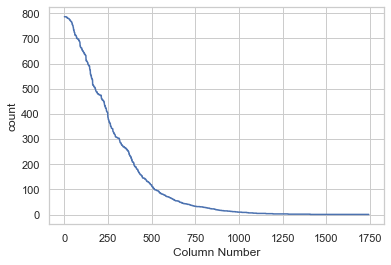

In [50]:
## count can be a knob (30-100) -> columns(800-500)
sns.lineplot(x=summary.index, y="count", data=summary)
plt.xlabel("Column Number")

In [62]:
## Remove columns by setting a threshold
threshold_count = 100
filter_columns = summary.loc[summary['count'] < threshold_count, 'column_name']
disease_filtered = disease_short.drop(columns=filter_columns)
disease_filtered.shape

(786, 537)

In [73]:
## Filter numeric types
numeric_columns = disease_filtered.select_dtypes(include=['number']).columns
object_columns = disease_filtered.select_dtypes(include=['object']).columns
cols = disease_filtered.columns
assert (len(set(cols) - (set(numeric_columns.to_list() + object_columns.to_list()))) == 0)
disease_numeric_df = disease_filtered.drop(columns=object_columns)
metadata_df = disease_filtered.loc[:, ['dataset_name', 'sampleID', 'disease', 'gender', 'country']]
disease_numeric_df.shape

(786, 517)

In [85]:
disease_df = disease_numeric_df.copy(deep=True)
disease_df = disease_df.fillna(disease_df.mean())

In [ ]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [87]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

n_disease = np.unique(metadata_df['disease'].to_list()).size
le = LabelEncoder()
labels = le.fit_transform(metadata_df['disease'])

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=n_disease, n_init=4,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=disease_df, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_disease, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=disease_df, labels=labels)

pca = PCA(n_components=n_disease).fit(disease_df)
kmeans = KMeans(init=pca.components_, n_clusters=n_disease, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=disease_df, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.059s	360995	0.177	0.195	0.186	0.094	0.177	-0.004
random   	0.042s	362501	0.178	0.198	0.187	0.096	0.178	-0.113
PCA-based	0.023s	361233	0.202	0.198	0.200	0.114	0.191	0.035
__________________________________________________________________________________
